Von Tim von Känel und Tim Birkner

In [1]:
import numpy as np
import matplotlib.pyplot as plt

First of all: we are going to introduce a dataset on that we apply our clustering method on:

In [2]:
def twospirals(n_points, noise=.5):
    """
     Returns the two spirals dataset.
    """
    epsilon = 0.1
    n = (np.random.rand(n_points,1)+epsilon) * 780 * (2*np.pi)/360
    d1x = -np.cos(n)*n + np.random.rand(n_points,1) * noise
    d1y = np.sin(n)*n + np.random.rand(n_points,1) * noise

    # hstack/vstack stacks data on top of each other (print shape to see what I mean)
    C_1 = np.hstack((d1x,d1y))
    C_2 = np.hstack((-d1x,-d1y))
    return np.vstack((C_1, C_2))

This is a dataset consisting of clusters twisting around each other. You don't need to understand the mathematics behind it, but you can play around with it if you like (make sure to train on the original dataset, not one you created)



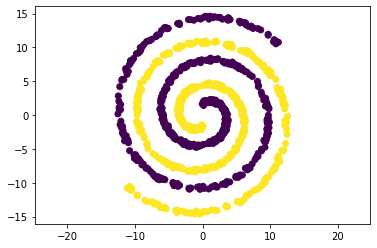

In [3]:
data_size = 500

dataset = twospirals(data_size)
labels = np.hstack((np.zeros(data_size),np.ones(data_size)))

# scatter makes a 2D scatter plot. Unfortunately you have to seperate the x-dim from the y-dim
# the labels are helpful for coloring. The algorithm does not use them, since this is unsupervised
plt.scatter(dataset[:,0], dataset[:,1], c = labels)
plt.axis('equal')
plt.show()

a) Implement the DBSCAN algorithm to classify points of the two clusters.

b) Plot a scatter plot highlighting the clusters that were found after finding good hyperparameter values eps and minPts.

c) Print accuracies for different data_size values.

d) For what kind of data_size values does the algorithm fail and why? What would you say are disadvantages of DBSCAN?

a) Implement the DBSCAN algorithm to classify points of the two clusters.

In [4]:
class DBSCAN():
    def __init__(self, radius, density):
        self.radius = radius
        self.density = density
        
    def euclidean_distance(self, x_1, x_2):
        return np.sqrt(np.sum((x_1-x_2)**2))
    
    def range_query(self, pair, pairs):
        idc = []
        for i in range(len(pairs)):
            if self.euclidean_distance(pair["sample"], pairs[i]["sample"]) < self.radius:
                idc.append(i)
        return idc
        
    def fit_predict(self, x):
        c = -1
        pairs = [{"sample": sample, "type": None} for sample in x]
        for i in range(len(pairs)):
            if pairs[i]["type"] != None:
                continue
            n = self.range_query(pairs[i], pairs)
            if len(n) < self.density:
                pairs[i]["type"] = "noise"
                continue
            c += 1
            pairs[i]["type"] = c
            n.remove(i)
            seed_idc = n
            while len(seed_idc) > 0:
                j = seed_idc.pop()
                if pairs[j]["type"] == "noise":
                    pairs[j]["type"] = c
                    continue
                if pairs[j]["type"] != None:
                    continue
                pairs[j]["type"] = c
                n = self.range_query(pairs[j], pairs)
                if len(n) >= self.density:
                    # union of two lists, which removes duplicates
                    seed_idc = list(set(seed_idc) | set(n))
        return np.array([-1 if x["type"] == None or x["type"] == "noise" else x["type"]  for x in pairs])


b) Plot a scatter plot highlighting the clusters that were found after finding good hyperparameter values eps and minPts.

In [5]:
scan = DBSCAN(radius=1.75, density=4)
clusters = scan.fit_predict(dataset)

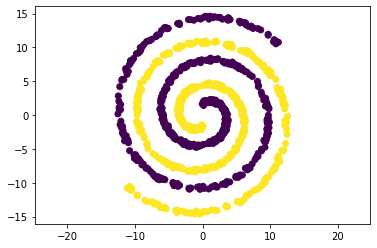

In [6]:
plt.scatter(dataset[:,0], dataset[:,1], c=clusters)
plt.axis('equal')
plt.show()

c) Print accuracies for different data_size values.

In [7]:
def accuracy(y_true, y_pred):
    if y_true.shape != y_pred.shape:
        raise ValueError(f"y_true shape is {y_true.shape} while y_pred shape is {y_pred.shape}.")
    return np.sum(y_true == y_pred) / y_true.shape[0]

In [8]:
for data_size in [25, 50, 100, 200, 400, 800]:
    dataset = twospirals(data_size)
    labels = np.hstack((np.zeros(data_size),np.ones(data_size)))
    clusters = scan.fit_predict(dataset)
    clusters = clusters.reshape((-1, 1))
    labels = labels.reshape((-1, 1))
    print(f"Accuracy for data_size={data_size} is {round(accuracy(labels, clusters), 3)}")

Accuracy for data_size=25 is 0.0
Accuracy for data_size=50 is 0.04
Accuracy for data_size=100 is 0.22
Accuracy for data_size=200 is 0.022
Accuracy for data_size=400 is 0.139
Accuracy for data_size=800 is 1.0


d) For what kind of data_size values does the algorithm fail and why? What would you say are disadvantages of DBSCAN?

The algorithm fails for small data_size values. Since the average distance between a sample and it's nearest sample get higher the smaller the data_size value is, it gets increasingly hard for the algorithm to find clusters of data.

Disadvantages of DBSCAN are that is has a runtime of O(n^2). In the examples above the runtime difference of data_size=800 and data_size=1200 was very noticeable. DBSCAN is also really sensitive to it's hyperparameters and it can take many experiment runs to find good hyperparamer values. 